In [1]:
import numpy as np
import pandas as pd

from helpers import*
from lenshelpers import*

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# Build the four classes 
config_repo_model = 'data/configFile/config_model'

size = 500
for i in np.arange(1,4):
    #model_name = config_repo_model + str(i) + '.yaml'
    res = Residual(size)
    res.build(i, per_error = 0.01)

print('Data Generation Finished')

/home/emma-hoggett/anaconda3/envs/deeplens/lib/python3.7/site-packages/pandas/core/generic.py:2620: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['class'], dtype='object')]

  encoding=encoding,


Data Generation Finished


In [3]:
metadata = pd.DataFrame()
for i in np.arange(1,4):
    [img, meta] = read_hdf5(i, path = "data/dataSet/")
    metadata = pd.concat([metadata,meta], ignore_index=True)
    if i == 1:
        final_array = img
    else:
         final_array = np.concatenate((final_array, img))
metadata ['ID'] = np.arange(0,final_array.shape[0])

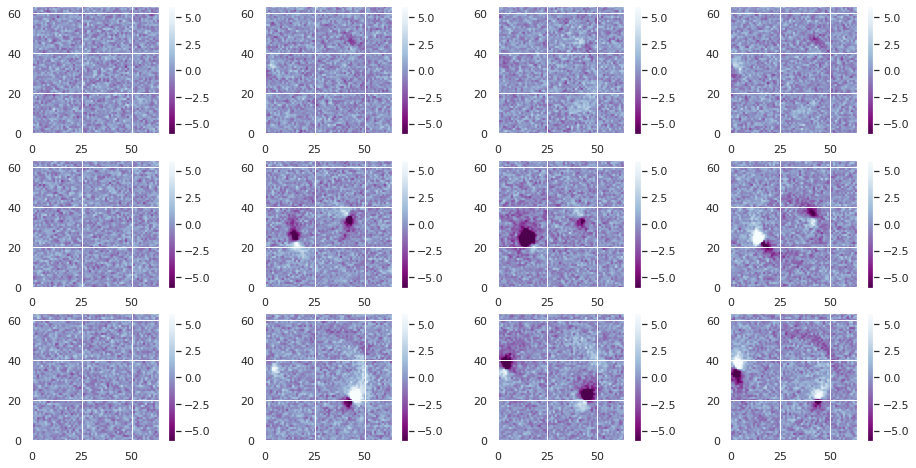

In [4]:
f, axes = plt.subplots(3, 4, figsize=(16, 8), sharex=False, sharey=False)
norm = colors.Normalize(vmin=-6, vmax=6)

for i in range(0,4):
    pos1 = axes[0,i].imshow(final_array[i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos2 = axes[1,i].imshow(final_array[4*size+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos3 = axes[2,i].imshow(final_array[8*size+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    f.colorbar(pos1, ax=axes[0,i])
    f.colorbar(pos2, ax=axes[1,i])
    f.colorbar(pos3, ax=axes[2,i])

plt.show()
f.savefig('figures/1percenterror.jpeg')

/home/emma-hoggett/anaconda3/envs/deeplens/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


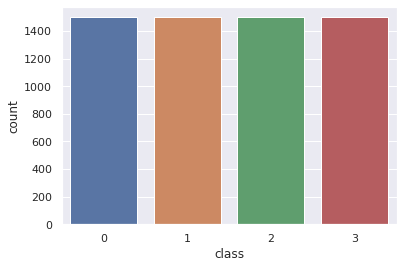

In [5]:
metadata.loc[[col == [1,0,0] for col in metadata['class']], 'class'] = 0
metadata.loc[[col == [0,1,0] for col in metadata['class']], 'class'] = 1
metadata.loc[[col == [0,0,1] for col in metadata['class']], 'class'] = 2
metadata.loc[[col == [0,1,1] for col in metadata['class']], 'class'] = 3

ax = sns.countplot(metadata['class'],label="Count")
fig = ax.get_figure()

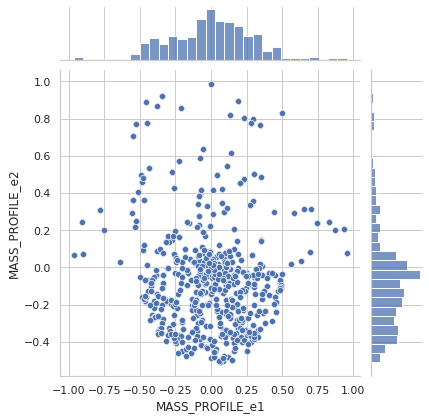

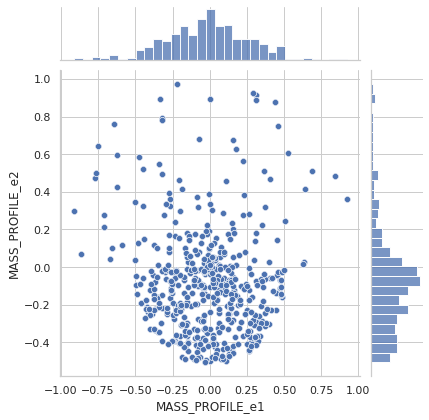

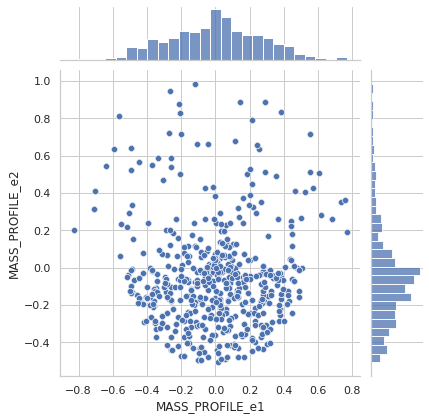

In [9]:
metadata_noerror = metadata.loc[metadata['class'] == 0]
metadata_masserror = metadata.loc[metadata['class'] == 1]
metadata_lighterror = metadata.loc[metadata['class'] == 2]
metadata_masslighterror = metadata.loc[metadata['class'] == 3]

sns.set_style("whitegrid")
sns.jointplot(x=metadata_lighterror['MASS_PROFILE_e1'], y=metadata_lighterror['MASS_PROFILE_e2']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masserror['MASS_PROFILE_e1'], y=metadata_masserror['MASS_PROFILE_e2']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masslighterror['MASS_PROFILE_e1'], y=metadata_masslighterror['MASS_PROFILE_e2']);

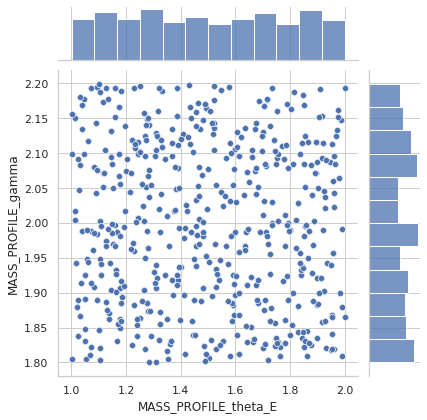

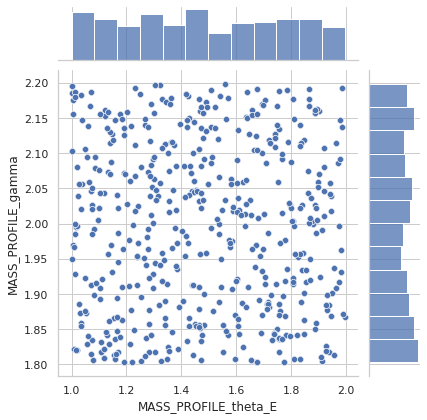

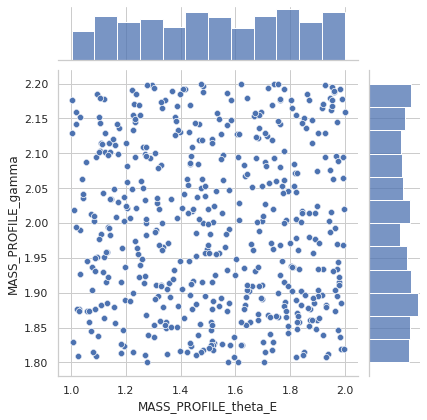

In [10]:
sns.set_style("whitegrid")
sns.jointplot(x=metadata_lighterror['MASS_PROFILE_theta_E'], y=metadata_lighterror['MASS_PROFILE_gamma']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masserror['MASS_PROFILE_theta_E'], y=metadata_masserror['MASS_PROFILE_gamma']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masslighterror['MASS_PROFILE_theta_E'], y=metadata_masslighterror['MASS_PROFILE_gamma']);